<a href="https://colab.research.google.com/github/ahsanuamal/ahsanuamal/blob/main/Single_Perceptron_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mengimport library yang dibutuhkan
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [2]:
#mendefinisikan input training (gerbang AND)
inputTraining = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
labelTraining = np.array([[-1],[-1],[-1],[1]])

In [3]:
#mendefinisikan klasifier NN
inputSize = inputTraining.shape[1]
model = Sequential()
model.add(Dense(units=1, input_dim=inputSize, use_bias=True,
                kernel_initializer = 'zeros',
                bias_initializer = 'zeros'))
model.compile(loss='mean_squared_error',
              optimizer='sgd')

In [4]:
#train NN
model.fit(inputTraining, labelTraining, epochs=5, batch_size=1)

Epoch 1/5
4/4 [==============================] - 13s 3ms/step - loss: 0.9933
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.8487
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7281
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6283
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.5462


In [6]:
#memprediksi data testing dengan model NN yg sdh ditraining
hasilPrediksi = np.sign(model.predict(inputTraining, batch_size=1).ravel())
print("label ground truth:\n", labelTraining)
print("hasil prediksi:\n", hasilPrediksi)

label ground truth:
 [[-1]
 [-1]
 [-1]
 [ 1]]
hasil prediksi:
 [-1. -1. -1.  1.]


In [7]:
#print bobot hasil training
weights = []
for layer in model.layers:
    weights.append(layer.get_weights())
print("bobot W:\n", weights)

bobot W:
 [[array([[0.17119707],
       [0.17017794]], dtype=float32), array([-0.17076959], dtype=float32)]]


In [8]:
#kode di bawah ini untuk mengeplot decision boundary saja

#fungsi untuk membuat mesh points sebagai input
#saat mengeplot contour dari decision boundary
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [9]:
#fungsi untuk mengeplot contour dari decision boundary
def plot_contours(clf, xx, yy, **params):
    input_mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = np.sign(clf.predict(input_mesh))
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

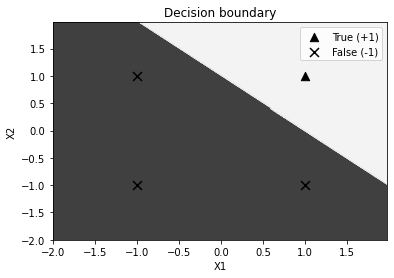

In [10]:
#plot decision boundary
X0, X1 = inputTraining[:, 0], inputTraining[:, 1]
xx, yy = make_meshgrid(X0, X1)
plt.figure()
plt.title("Decision boundary")
plot_contours(model, xx, yy,  cmap=plt.cm.gray, alpha=0.8)
plt.scatter(X0[labelTraining.ravel()==1], X1[labelTraining.ravel()==1],
            marker='^', s=70, c='black', label='True (+1)')
plt.scatter(X0[labelTraining.ravel()==-1], X1[labelTraining.ravel()==-1],
            marker='x', s=80, c='black', label='False (-1)')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()